# **train a simple logistic regression model using Numpy**

- supervised learning
- classification

In [1]:
import numpy as np

# load and visualize data in this project
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
lr = 0.01
epochs = 10000
epoch_verbose = 100

## **Dataset**

In [3]:
df = pd.read_csv("dataset/buying_house_possibility_dataset_1000.csv")
df

,income,age,family_size,credit_score,house_price,buy_house
0,17,48,3,733.432493,279,1
1,14,44,3,654.099562,292,1
2,18,35,3,778.901875,396,1
3,22,28,4,644.942986,247,1
4,13,41,5,642.542256,259,1
...,...,...,...,...,...,...
995,13,45,2,663.014159,343,1
996,23,34,2,743.297634,199,1
997,18,26,5,685.871195,267,1
998,12,33,5,691.414122,320,1


In [4]:
x_len = len(df.columns) - 1
dataset_array = df.to_numpy()
x = dataset_array[:, :x_len] # features
y = dataset_array[:, -1] # lables

### Data Preprocessing (Standardization)

In [5]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=0)
    return (X - mean) / (std + 1e-8)

In [6]:
X = standardize(x)
X

array([[ 0.49232952,  1.34184422,  0.03145258,  0.70811212, -0.43344509],
       [-0.12929866,  0.91290017,  0.03145258, -0.90473575, -0.16900046],
       [ 0.69953891, -0.05222394,  0.03145258,  1.63251005,  1.94655659],
       ...,
       [ 0.69953891, -1.01734805,  1.42934491, -0.25881469, -0.67754783],
       [-0.54371745, -0.26669596,  1.42934491, -0.14612634,  0.40057259],
       [ 0.49232952, -0.91011204, -0.66749359, -0.14638457, -1.1657533 ]])

## **First Forwardpropagation**



In [7]:
w = np.random.randn(x_len) # number of features = number of weights
b = 0

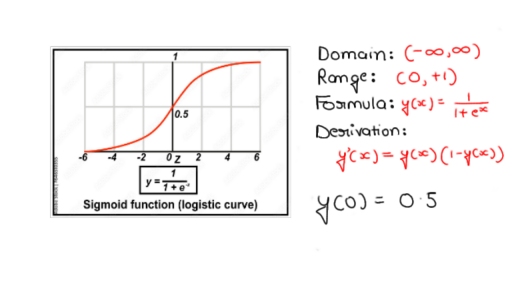

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# about sigmoid
image = img.imread("sigmoid-image-by-anubhav-shukla.png")
plt.axis("off")
plt.imshow(image)

In [9]:
z = X.dot(w) + b
y_pred = sigmoid(z)

In [10]:
y_table = {
  "y_true": y,
  "y_pred": y_pred
}

#load data into a DataFrame object:
ydf = pd.DataFrame(y_table)

print(ydf)

     y_true    y_pred
0       1.0  0.990770
1       1.0  0.257820
2       1.0  0.985259
3       1.0  0.005925
4       1.0  0.338391
..      ...       ...
995     1.0  0.243957
996     1.0  0.797876
997     1.0  0.164643
998     1.0  0.675855
999     1.0  0.052754

[1000 rows x 2 columns]


- As you can see, using sigmoid, our predictions are between zero and one.

## **First Backpropagation**


### Loss Function (BCE)

In [11]:
def bce(y_true, y_pred):
    # BCE = − [ y_true * log(y_pred​) + (1 − y_true) * log(1 − y_pred​)]
    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Prevent log(0)
    loss = -np.mean(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
    return loss

bce(y, y_pred)

np.float64(1.8202164057841628)

### Optimizer (Gradient Descent)

In [12]:
# gradient = dloss/dw >>> dloss/dy^ * dy^/dz * dz/dw
dw = X.T.dot(y_pred - y) / len(y)
db = np.mean(y_pred - y)

# w_new = w_old - lr * gradient
new_w = w - lr * dw
new_b = b - lr * db

In [13]:
w_table = {
    "w_old": w,
    "w_new": new_w,
}

wdf = pd.DataFrame(w_table)
print(wdf)
print()
print("b:", b, "new_b:", new_b)

      w_old     w_new
0 -0.713114 -0.712184
1  1.897490  1.895414
2  1.015291  1.013972
3  3.276145  3.273263
4 -0.297981 -0.298119

b: 0 new_b: 0.0008816954848986293


## **Training Cycle**

In [14]:
losses = []
for epoch in range(1, epochs + 1):
    y_pred = sigmoid(X.dot(w) + b) # predition
    loss = bce(y, y_pred) # validation
    losses.append(loss) # for loss plot

    # optimization
    w -= lr * (X.T.dot(y_pred - y) / len(y))
    b -= lr * (np.mean(y_pred - y))

    # monitoring
    if epoch % epoch_verbose == 0:
        print(f"epoch {epoch}, loss: {loss}")

epoch 100, loss: 1.6648273983466888
epoch 200, loss: 1.515071585150222
epoch 300, loss: 1.37383220226527
epoch 400, loss: 1.2426465076187045
epoch 500, loss: 1.123267113390256
epoch 600, loss: 1.0175198974643862
epoch 700, loss: 0.9270154251533163
epoch 800, loss: 0.8527270067584344
epoch 900, loss: 0.7945725287045614
epoch 1000, loss: 0.7512392041274788
epoch 1100, loss: 0.7204167495788595
epoch 1200, loss: 0.6993440258743197
epoch 1300, loss: 0.6853722071980665
epoch 1400, loss: 0.676309560636686
epoch 1500, loss: 0.67051695608046
epoch 1600, loss: 0.6668486814634523
epoch 1700, loss: 0.6645383929450475
epoch 1800, loss: 0.6630876292429912
epoch 1900, loss: 0.662177746684645
epoch 2000, loss: 0.6616071736966946
epoch 2100, loss: 0.6612491697116639
epoch 2200, loss: 0.6610243046275552
epoch 2300, loss: 0.6608828713642055
epoch 2400, loss: 0.6607937730105717
epoch 2500, loss: 0.6607375466187196
epoch 2600, loss: 0.6607019992689156
epoch 2700, loss: 0.6606794827628275
epoch 2800, loss: 

## **Reports**

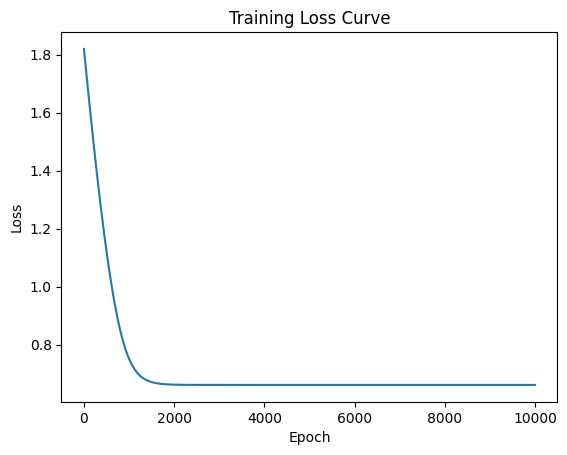

In [15]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.savefig('results/loss_plot.png')
plt.show()